In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

In [2]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games.head()

,name,all_reviews,release_date,developer,publisher,genre,mature_content,original_price,discount_price,genre_Action,...,languages_Simplified Chinese,languages_Slovakian,languages_Spanish - Latin America,languages_Spanish - Spain,languages_Swedish,languages_Thai,languages_Traditional Chinese,languages_Turkish,languages_Ukrainian,languages_Vietnamese
0,DOOM,92,2016-05-12,id Software,"Bethesda Softworks,Bethesda Softworks",{Action},False,19.99,14.99,1,...,0,0,0,1,0,0,1,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,2017-12-21,PUBG Corporation,"PUBG Corporation,PUBG Corporation","{Adventure, Massively Multiplayer, Action}",True,29.99,NaN,1,...,1,0,0,1,0,1,1,1,1,0
2,BATTLETECH,71,2018-04-24,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","{Strategy, Adventure, Action}",False,39.99,NaN,1,...,0,0,0,0,0,0,0,0,0,0
3,DayZ,61,2018-12-13,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","{Adventure, Massively Multiplayer, Action}",False,44.99,NaN,1,...,1,0,0,1,0,0,1,0,0,0
4,EVE Online,74,2003-05-06,CCP,"CCP,CCP","{RPG, Strategy, Massively Multiplayer, Action}",False,0.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
games['all_reviews'] = pd.to_numeric(games['all_reviews'])

In [4]:
# All genre 

allgenre = games.filter(regex='^genre_')
print("Dimension of allgenre: ", allgenre.shape)

Dimension of allgenre:  (15982, 9)


In [5]:
genre_reviews = pd.concat([allgenre, pd.DataFrame(games['all_reviews'])], axis = 1)

<AxesSubplot:>

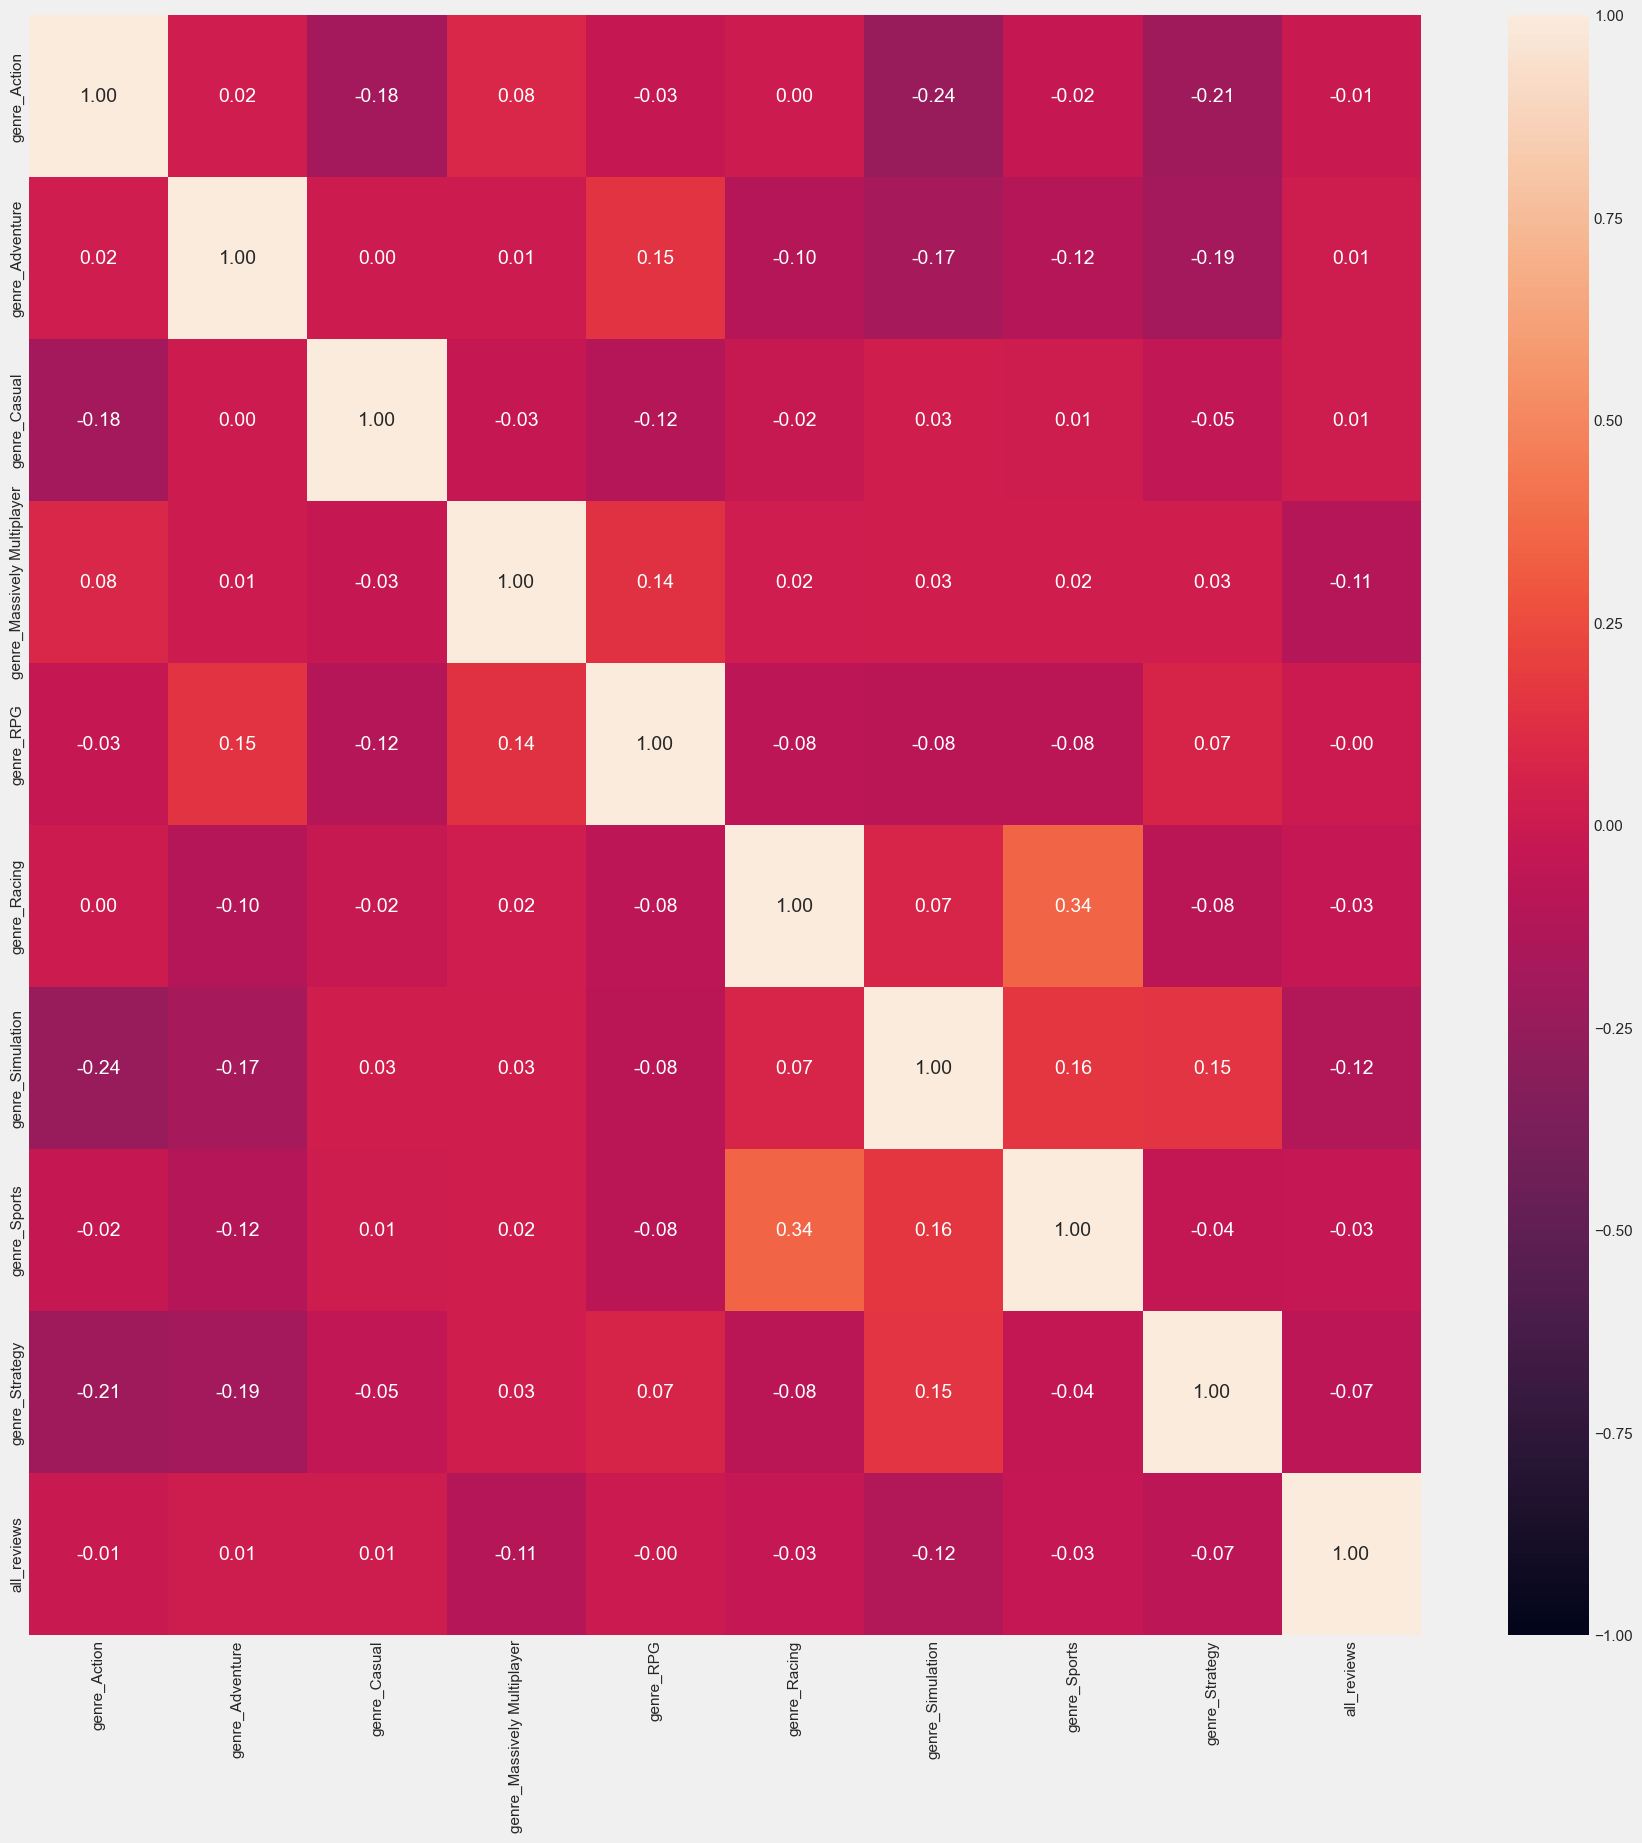

In [6]:
# All genre vs all reviews - correlation

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20,20))
sb.heatmap(genre_reviews.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [7]:
games.dtypes


name                                       object
all_reviews                                 int64
release_date                               object
developer                                  object
publisher                                  object
                                       ...       
languages_Thai                   Sparse[int32, 0]
languages_Traditional Chinese    Sparse[int32, 0]
languages_Turkish                Sparse[int32, 0]
languages_Ukrainian              Sparse[int32, 0]
languages_Vietnamese             Sparse[int32, 0]
Length: 427, dtype: object

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
X = allgenre
y = games['all_reviews']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(max_iter=1000)

In [12]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("Model accuracy:", accuracy)

MSE: 755.9102283390679
MAE: 21.204566781357524
Model accuracy: 0.04253988113856741


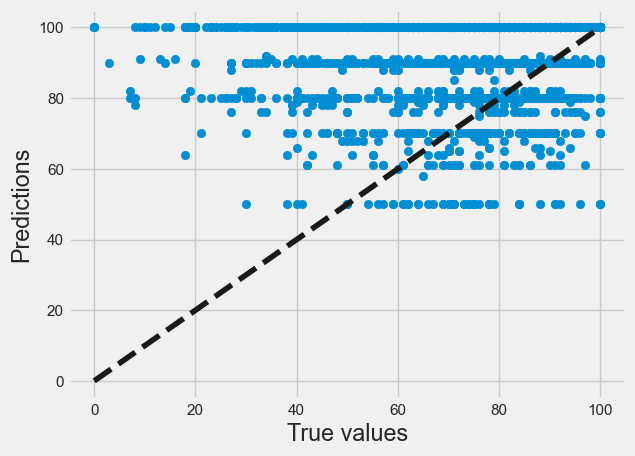

In [15]:
import matplotlib.pyplot as plt


# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k') # plot diagonal line
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

## Support Vector Regression 
but in the code line y_pred = model.predict(X_test) has an error.

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create SVR model
model2 = SVR(kernel='rbf', C=1, gamma='scale')

In [19]:
X_train = X_train.values
X_test = X_test.values

In [20]:
# Train model on training data
model2.fit(X_train, y_train)

SVR(C=1)

In [21]:
# Make predictions on testing data
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)

MSE: 755.9102283390679
MAE: 21.204566781357524


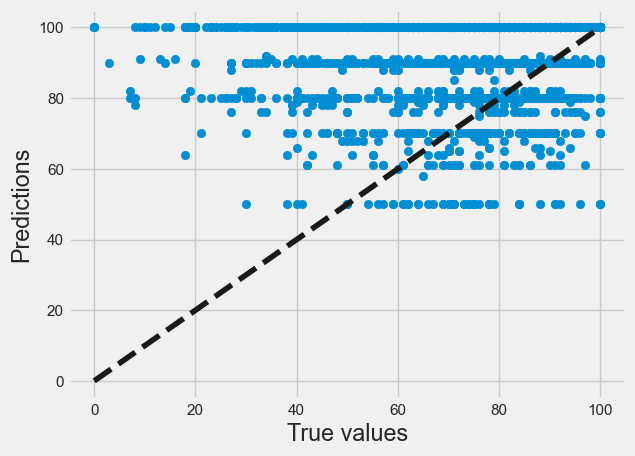

In [23]:
import matplotlib.pyplot as plt


# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k') # plot diagonal line
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd


# Separate features and target variable
X = allgenre
y = games['all_reviews']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on testing data
y_pred = model.predict(X_test)

# Calculate mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  330.7467201323504
Mean Absolute Error:  14.365444508754374


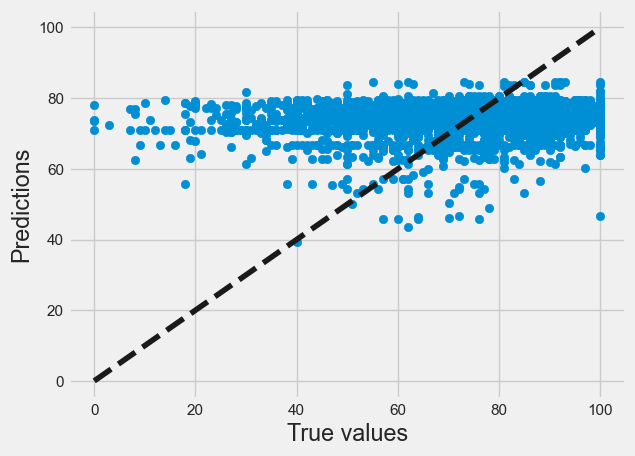

In [25]:
import matplotlib.pyplot as plt


# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k') # plot diagonal line
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()